In [1]:
import torch
torch.cuda.is_available()

True

In [7]:
torch.__version__

'2.3.1+cpu'

C:\Users\khsfu\AppData\Local\Temp\ipykernel_30220\3600696900.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


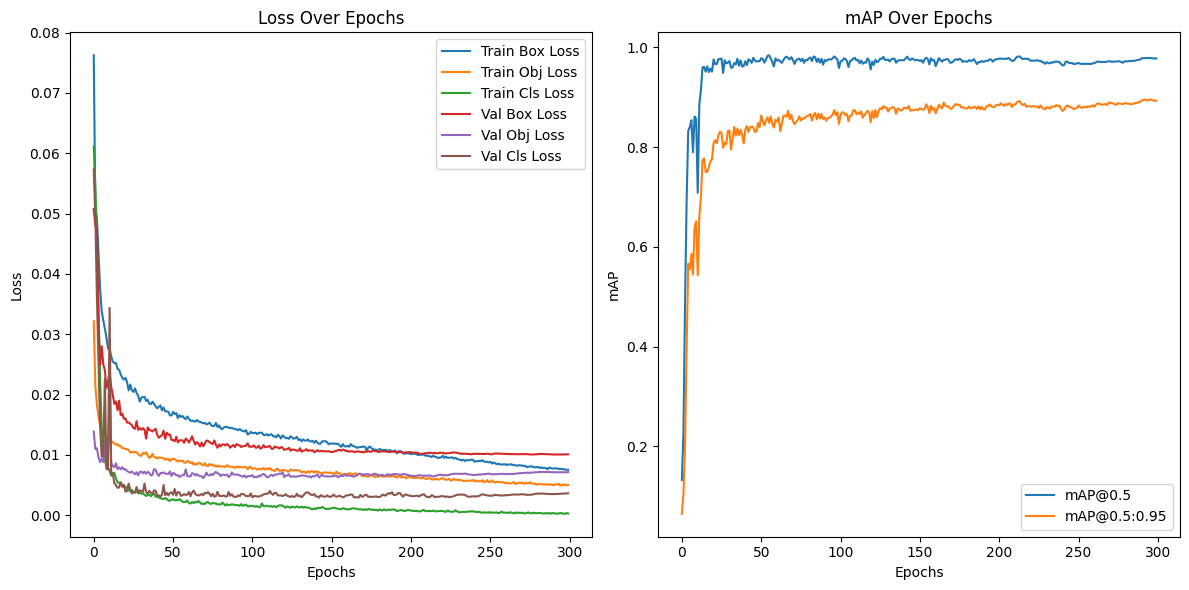

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_metrics(csv_file):
    # CSV 파일 로드
    df = pd.read_csv(csv_file)
    
    # 컬럼 이름에서 공백 제거
    df.columns = [col.strip() for col in df.columns]
    
    # 데이터에서 공백 제거
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # 필요한 컬럼 선택
    epochs = df['epoch'].astype(float)
    train_box_loss = df['train/box_loss'].astype(float)
    train_obj_loss = df['train/obj_loss'].astype(float)
    train_cls_loss = df['train/cls_loss'].astype(float)
    val_box_loss = df['val/box_loss'].astype(float)
    val_obj_loss = df['val/obj_loss'].astype(float)
    val_cls_loss = df['val/cls_loss'].astype(float)
    mAP_0_5 = df['metrics/mAP_0.5'].astype(float)
    mAP_0_5_0_95 = df['metrics/mAP_0.5:0.95'].astype(float)

    # 손실 시각화
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_box_loss, label='Train Box Loss')
    plt.plot(epochs, train_obj_loss, label='Train Obj Loss')
    plt.plot(epochs, train_cls_loss, label='Train Cls Loss')
    plt.plot(epochs, val_box_loss, label='Val Box Loss')
    plt.plot(epochs, val_obj_loss, label='Val Obj Loss')
    plt.plot(epochs, val_cls_loss, label='Val Cls Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    # mAP 시각화
    plt.subplot(1, 2, 2)
    plt.plot(epochs, mAP_0_5, label='mAP@0.5')
    plt.plot(epochs, mAP_0_5_0_95, label='mAP@0.5:0.95')
    plt.xlabel('Epochs')
    plt.ylabel('mAP')
    plt.title('mAP Over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# CSV 파일 경로 설정
csv_file = 'runs/train/exp3/results.csv'
visualize_metrics(csv_file)
